NAME: Naveen Jajapur

# Machine Learning Practice - Live
## Homework B

### Objectives
* Implement classes in Python
* Construct Data Pre-processing Pipelines that perform:
  + Imputation
  + Differentiation
  + Filtering

### Instructions
* All Homework must be individual work.  Do not look at or copy solutions of other students or that are available on the Internet or via LLMs
* Only work in a copy of the file that is from your ~/homework_in/ directory
   + __If you do not use your own copy of this file, then it is an automatic zero on the assignment__
* Read the code below 
* For any cell that is flagged as *TODO*, complete the code according to the specifications
* Execute each cell and verify that it is showing correct results
* Hand-In Procedure
  + Make sure that your notebook has been saved.  You are responsible for ensuring that the copy that you submit is current and complete
  + The name of the file should be the same as what we gave you
  + Download this file to your local machine (extension: .ipynb)
  + Submit to the Gradescope Notebook HWB dropbox
  
### General References
(there are hints here)
* [Sci-kit Learn Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
* [Sci-kit Learn Impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)
* [Sci-kit Learn Preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
* [Pandas Interpolate](https://pandas.pydata.org/pandas-docs/version/0.16/generated/pandas.DataFrame.interpolate.html)
* [Pandas bfill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.bfill.html)
* [Pandas ffill()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html)

In [45]:
# EXECUTE CELL

#Import required packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Default figure parameters
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.constrained_layout.use'] = True


# LOAD DATA

In [46]:
# EXECUTE CELL
fname ='/mlp/datasets/baby1/subject_k1_w10_hw2.csv'

baby_data_raw = pd.read_csv(fname)
baby_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           15000 non-null  float64
 1   left_wrist_x   13458 non-null  float64
 2   left_wrist_y   13454 non-null  float64
 3   left_wrist_z   13454 non-null  float64
 4   right_wrist_x  13514 non-null  float64
 5   right_wrist_y  13514 non-null  float64
 6   right_wrist_z  13514 non-null  float64
dtypes: float64(7)
memory usage: 820.4 KB


In [47]:
""" 
EXECUTE CELL
"""
baby_data_raw.describe()

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
count,15000.000000,13458.000000,13454.000000,13454.000000,13514.000000,13514.000000,13514.000000
mean,149.990000,0.243580,0.162076,-0.044767,0.271218,-0.120768,-0.207248
std,86.605427,0.084823,0.093114,0.060566,0.055190,0.047123,0.054263
min,0.000000,0.027525,-0.046680,-0.186060,0.081230,-0.275120,-0.311197
25%,74.995000,0.177911,0.096319,-0.082849,0.238649,-0.140773,-0.245453
50%,149.990000,0.251879,0.154445,-0.045112,0.277339,-0.111330,-0.216992
75%,224.985000,0.308732,0.245144,-0.004720,0.314673,-0.085764,-0.158773
max,299.980000,0.389957,0.334027,0.147053,0.396959,-0.040851,-0.007693


In [48]:
""" TODO
Call head() on the data to observe the first few examples
"""
 # TODO
baby_data_raw.head()

,time,left_wrist_x,left_wrist_y,left_wrist_z,right_wrist_x,right_wrist_y,right_wrist_z
0,0.00,NaN,0.293503,-0.092803,0.314738,-0.113438,-0.154972
1,0.02,NaN,0.293445,-0.092968,0.315143,-0.113476,-0.154807
2,0.04,NaN,NaN,NaN,0.315974,-0.113521,-0.154429
3,0.06,NaN,0.293285,-0.093356,0.316709,-0.113555,-0.154063
4,0.08,0.163611,0.293237,-0.093475,0.317206,-0.113534,-0.153886


In [49]:
""" TODO
Display the column names for the data
"""

#TODO
print("Columns are: ")
for column in baby_data_raw.columns:
    print(column)


Columns are: 
time
left_wrist_x
left_wrist_y
left_wrist_z
right_wrist_x
right_wrist_y
right_wrist_z


In [50]:
""" EXECUTE CELL

Determine whether any data are NaN. Use isna() and
any() to obtain a summary of which features have at 
least one missing value
"""
baby_data_raw.isna().any()

time             False
left_wrist_x      True
left_wrist_y      True
left_wrist_z      True
right_wrist_x     True
right_wrist_y     True
right_wrist_z     True
dtype: bool

# Create Pipeline Elements
In the lecture, some of the Pipeline components received or returned numpy arrays, while others received or returned pandas DataFrames. For this assignment, transform methods for all the Pipeline components will take input as a pandas DataFrame and return a DataFrame.

In [51]:
""" PROVIDED
Pipeline component object for selecting a subset of specified features
"""
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribs):
        self.attribs = attribs
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame that contains the selected attributes
        '''
        return X[self.attribs]
 

In [54]:
"""
TODO 

Complete the Pipeline component object for interpolating and filling in 
gaps within the data. Whenever data are missing in between valid values, 
use interpolation to fill in the gaps. For example,
    1.2 NaN NaN 1.5 
becomes
    1.2 1.3 1.4 1.5 

Whenever data are missing on the edges of the data, fill in the gaps
with the first available valid value. For example,
    NaN NaN 2.3 3.6 3.2 NaN
becomes
    2.3 2.3 2.3 3.6 3.2 3.2
The transform() method you create must fill in the holes and the edge cases.

Hint: there are DataFrame methods that will help you implement these features
"""
class InterpolationImputer(BaseEstimator, TransformerMixin):
    def __init__(self, method='quadratic'):
        self.method = method
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return: DataFrame without NaNs
        '''
        # Interpolate holes within the data (from class)
        Xout = X.interpolate(method=self.method)
        
        # TODO: Fill in the NaNs on the edges of the data
        Xout = Xout.fillna(method='ffill') # this would fill NaN from the beginning 
        Xout = Xout.fillna(method='bfill') # this would fill NaN from the end
        
        
        # Return the imputed dataframe
        return Xout
    


In [55]:
""" 
PROVIDED

Pipeline component object for computing the derivative for specified features
"""
class DerivativeComputer(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, prefix='d_', dt=1.0):
        '''
        Constructor
        
        :param attribs: List of DF attributes that we will compute derivatives for
        :param prefix: Prefix for the new derivative attribute names
        :param dt: Duration between samples
        '''
        self.attribs = attribs
        self.prefix = prefix
        self.dt = dt
    
    def fit(self, x, y=None):
        ''' 
        Nothing to fit
        '''
        return self
    
    def transform(self, X):
        '''
        :param X: a DataFrame
        :return: a DataFrame with additional features for the derivatives
        '''
        Xout = X.copy()
        if self.attribs is None:
            # Default is to differentiate all columns
            self.attribs = Xout.columns

        # Iterate over all of the attributes that we need to compute velocity over
        for attrib in self.attribs:
            # Extract the numpy array of data
            vals = Xout[attrib].values
            # Compute the difference between neighboring timeseries elements
            diff = vals[1:] - vals[0:-1]
            # Take into account the amount of time between timeseries samples
            deriv = diff / self.dt
            # Add a zero to the end so the resulting velocity vector is the same
            #   length as the position vector
            deriv = np.append(deriv, 0)
            
            # Add a new derivative attribute to the DataFrame
            attrib_name = self.prefix + attrib
            Xout[attrib_name] = pd.Series(deriv)

        return Xout

In [56]:
"""
With our infant data, the sensors can give us somewhat noisy data, adding
an extra, high-frequency signal on top of our estimates of sensor positions.
One way to smooth out these high-frequency effects is to convolve our 
original signal with a smoothing kernel.  Here, we will use a Gaussian kernel.
This smoothing process reduces these noise effects, and generally improves 
subsequent analysis.  

With a Gaussian kernel of width 5, the value of output of the convolution at time t, 
x'[t], is a weighted average of the x[]'s around t, with the highest weight 
being for x[t], a lower weight for x[t-1] and x[t+1], an even lower weight for
x[t-2] and x[t+2], etc.  For the Gaussian kernel, we use the Gaussian (normal) 
distribution to determine what the weight for each point should be in 
our weighted average. The calculation of this is done for you.

Complete the GaussianFilter component object for smoothing specific features
using a Gaussian kernel. Here is the example formula for a filter of size k=7:
    x'[t] = ( w[0]*x[t-3] + w[1]*x[t-2] + w[2]*x[t-1] + w[3]*x[t]
           + w[4]*x[t+1] + w[5]*x[t+2] + w[6]*x[t+3])
                
This can be implemented similarly to how the derivative is computed, but will
require:
1. Before filtering, pad both ends of x with k//2 copies of the adjacent
value.  This will mean that the length of the vector
after convolution is the same as the original length of x.
For example:
                1.3 2.1 4.4 4.1 3.2
would be padded as follows:

    1.3 1.3 1.3 1.3 2.1 4.4 4.1 3.2 3.2 3.2 3.2
    
Note that we are assuming that our kernels lengths are odd.

2. Iterating over the k filter elements, rather than interating over the 
samples in x.  Remember that for loops with many iterations in python 
are very inefficient relative to the loops inside of the numpy methods.

"""


def computeweights(length=3, sigma=1):
    '''
    PROVIDED
    
    Computes the weights for a Gaussian filter kernel
    :param length: the number of terms in the filter kernel
    :param sigma: the standard deviation (i.e. the scale) of the Gaussian
    :return: a vector of filter weights for the Gaussian kernel
    '''
    limit = 2.5
    x = np.linspace(-limit, limit, length)
    kernel = stats.norm.pdf(x, scale=sigma)
    
    # Return the normalized kernel so that the sum is 1
    return kernel / kernel.sum()

In [58]:
# TODO
# Create four different kernels using the above function: length is 19 and standard deviation is 0.25, 0.5, 1, and 2, respectively

#TODO
kernel_025 = computeweights(length=19, sigma=0.25)
kernel_05 = computeweights(length=19, sigma=0.5)
kernel_1 = computeweights(length=19, sigma=1)
kernel_2 = computeweights(length=19, sigma=2)


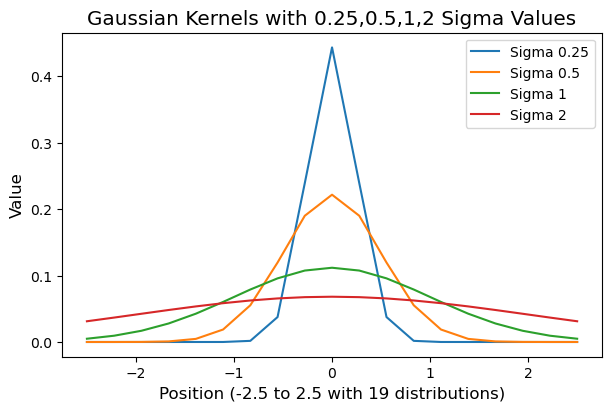

In [59]:
# TODO
# Plot each of the kernels on a single figure
# Don't forget your labels!

# TODO

plt.plot(x_vals, kernel_025, label="Sigma 0.25")
plt.plot(x_vals, kernel_05, label="Sigma 0.5")
plt.plot(x_vals, kernel_1, label="Sigma 1")
plt.plot(x_vals, kernel_2, label="Sigma 2")

plt.xlabel('Position (-2.5 to 2.5 with 19 distributions)')
plt.title('Gaussian Kernels with 0.25,0.5,1,2 Sigma Values')
plt.ylabel('Value')
plt.legend()
plt.show()

In [13]:
'''
TODO

Complete the implementation of the GaussianFilter class
'''
class GaussianFilter(BaseEstimator, TransformerMixin):
    def __init__(self, attribs=None, kernelsize=3, sigma=1):
        '''
        :param attribs: The list of columns in the DF to filter
        :param kernelsize: Integer number of elements in the Gaussian Kernel
        :param sigma: The standard deviation of the Gaussian Kernel
        '''
        # Attributes to filter
        self.attribs = attribs
        
        # Number of kernel elements 
        self.kernelsize = kernelsize
        
        # Check that we have an odd kernel size
        if kernelsize % 2 == 0:
            raise Exception("Expecting an odd kernel size")

        # Standard deviation of the Gaussian
        self.sigma = sigma
        
        # Compute the kernel element values
        self.weights = computeweights(length=kernelsize, sigma=sigma)
        
        print("KERNEL WEIGHTS", self.weights)
    
    def fit(self, x, y=None):
        '''
        Nothing to fit
        '''
        return self
    
    def transform(self, X): # TODO
        '''
        :param X: is a DataFrame
        :return:: a DataFrame with the smoothed signals
        '''
        w = self.weights
        ks = self.kernelsize
        # Create a copy of the original DataFrame
        Xout = X.copy()
        
        # Select all attributes if unspecified
        if self.attribs is None:
          self.attribs = Xout.columns
        
        # Iterate over the attributes
        for attrib in self.attribs:
            # Extract the numpy vector
            vals = Xout[attrib].values
            # TODO: pad signal at both the front and end of the vector so that after
            #   convolution, the length is the same as the lenght of vals.  Use 
            #   vals[0] and vals[-1] to pad the front and back, respectively.
            #   You may assume that the kernel size is always odd
            
            pad_size = ks // 2 # integer division
            
            # Compute the front and back padding vectors
            frontpad = np.full(pad_size, vals[0]) 
            backpad = np.full(pad_size, vals[-1])
            vals = np.concatenate([frontpad, vals, backpad])
            
            # TODO: apply filter
            # Implementation is the same as for the DerivativeComputer element, but
            #   more general.  You must iterate over the kernel elements.
            #   (NOTE: due to the wonky way indexing works in python, you will have
            #   specific code for one index & iterate over the remaining k-1 indices)
            
            
            # Filter window offset
            ofst = ks - 1 
            
            # Last term
            avg =  w[ofst] * vals[ofst:]#TODO
            # Rest of the terms
            for i in range(ofst): 
                avg +=  w[i] * vals[i:i-ofst]#TODO
            
            # replace noisy signal with filtered signal
            Xout[attrib] =  avg# TODO
            
        return Xout
    

# Construct Pipelines

In [14]:
""" 
TODO

Set up convenience variables. Use the three components of the left wrist.
"""

# Names of the right wrist columns
selected_names =  ['left_wrist_x','left_wrist_y','left_wrist_z']

nselected = len(selected_names)



In [15]:
""" 
TODO

Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data by linearly interpolating the values 
   in between existing data and fills the remaining gaps at the edges
   of the data with the first or last valid value
3. Computes the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the period or elapsed time (dt) between 
   the samples is .02 seconds
"""

timeselector = DataFrameSelector(['time'])

# Create the pipeline
pipe1 = Pipeline([
    ('feature_selection', DataFrameSelector(selected_names)),
    ('interpolation', InterpolationImputer(method='linear')),
    ('compute_derivatives', DerivativeComputer(attribs=selected_names, dt=0.02))
    # TODO
])

In [16]:
""" TODO
Create a pipeline that:
1. Selects a subset of features specified above
2. Fills gaps within the data by linearly interpolating the values 
   in between existing data and fills the remaining gaps at the edges
   of the data with the first or last valid value
3. Smooths the data with a Gaussian Filter. Use a standard deviation 
   of 2 and a kernel size of 19 for the filter
4. Compute the derivatives of the selected features. The data are 
   sampled at 50 Hz, therefore, the period or elapsed time (dt) between 
   the samples is .02 seconds (dt=.02)
"""
pipe2 = Pipeline([
    ('feature_selection', DataFrameSelector(selected_names)),
    ('interpolation', InterpolationImputer(method='linear')),
    ('smooth',GaussianFilter(kernelsize=19,sigma=2)),
    ('compute_derivatives', DerivativeComputer(attribs=selected_names, dt=0.02))
    # TODO
])

KERNEL WEIGHTS [0.03119005 0.03674732 0.04246759 0.04814065 0.05352895 0.0583832
 0.06246108 0.06554709 0.06747142 0.06812533 0.06747142 0.06554709
 0.06246108 0.0583832  0.05352895 0.04814065 0.04246759 0.03674732
 0.03119005]


In [60]:
""" TODO

Use the appropriate pipeline elements to extract the selected raw kinematic data and time
"""
pipe_extract = Pipeline([
    ('feature_selection', DataFrameSelector(selected_names)) 
])
baby_data0 = pipe_extract.transform(baby_data_raw)
time_df = timeselector.transform(baby_data_raw)


In [61]:
# EXECUTE CELL

baby_data0.describe()

,left_wrist_x,left_wrist_y,left_wrist_z
count,13458.000000,13454.000000,13454.000000
mean,0.243580,0.162076,-0.044767
std,0.084823,0.093114,0.060566
min,0.027525,-0.046680,-0.186060
25%,0.177911,0.096319,-0.082849
50%,0.251879,0.154445,-0.045112
75%,0.308732,0.245144,-0.004720
max,0.389957,0.334027,0.147053


In [19]:
# EXECUTE CELL
time_df.describe()

,time
count,15000.000000
mean,149.990000
std,86.605427
min,0.000000
25%,74.995000
50%,149.990000
75%,224.985000
max,299.980000


In [62]:
""" TODO

Fit both Pipelines to the raw data and transform the raw data into processed data
"""
baby_data1 = pipe1.fit_transform(baby_data_raw)
baby_data2 = pipe2.fit_transform(baby_data_raw)

# Visualize Data

In [63]:
""" 
EXECUTE CELL

Display the summary statistics for the data
from both pipelines
"""
baby_data1.describe() 

,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.244186,0.161478,-0.044664,0.000694,-0.000705,0.000002
std,0.084979,0.093011,0.060630,0.082732,0.058960,0.087525
min,0.027525,-0.046680,-0.186060,-1.024850,-0.970700,-1.600800
25%,0.178381,0.096099,-0.082856,-0.012800,-0.011800,-0.018100
50%,0.254316,0.153330,-0.044753,0.000750,-0.001000,-0.001650
75%,0.308836,0.244393,-0.004492,0.014775,0.010150,0.014550
max,0.389957,0.334027,0.147053,1.469050,0.717350,0.810550


In [64]:
# EXECUTE CELL

baby_data2.describe() 

,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.244186,0.161478,-0.044664,0.000694,-0.000704,0.000003
std,0.084737,0.092910,0.060251,0.054811,0.036715,0.058791
min,0.028760,-0.044923,-0.185653,-0.501345,-0.327738,-0.661693
25%,0.178344,0.096190,-0.082893,-0.009496,-0.010112,-0.014303
50%,0.254565,0.153371,-0.044210,0.000780,-0.001150,-0.001861
75%,0.308841,0.244483,-0.004526,0.012696,0.007834,0.010527
max,0.385583,0.320005,0.140720,0.505668,0.207813,0.481326


In [65]:
""" TODO

Display the first 10 values for the data
from each pipeline
"""
# Display the first 10 rows of baby_data1
print("First 10 rows of baby_data1:")
display(baby_data1.head(10))  # Using display for cleaner output

# Display the first 10 rows of baby_data2
print("First 10 rows of baby_data2:")
display(baby_data2.head(10))  # Using display for cleaner output


First 10 rows of baby_data1:


,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
0,0.163611,0.293503,-0.092803,0.00000,-0.00290,-0.00825
1,0.163611,0.293445,-0.092968,0.00000,-0.00400,-0.00970
2,0.163611,0.293365,-0.093162,0.00000,-0.00400,-0.00970
3,0.163611,0.293285,-0.093356,0.00000,-0.00240,-0.00595
4,0.163611,0.293237,-0.093475,-0.01165,-0.00170,-0.00915
5,0.163378,0.293203,-0.093658,-0.01195,-0.00065,-0.00385
6,0.163139,0.293190,-0.093735,-0.00940,0.00005,-0.00630
7,0.162951,0.293191,-0.093861,-0.01285,-0.00025,-0.00385
8,0.162694,0.293186,-0.093938,-0.00875,-0.00340,-0.00875
9,0.162519,0.293118,-0.094113,-0.01230,-0.00085,-0.00425


First 10 rows of baby_data2:


,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
0,0.163480,0.293393,-0.093130,-0.003023,-0.001173,-0.003885
1,0.163420,0.293369,-0.093207,-0.003697,-0.001251,-0.004319
2,0.163346,0.293344,-0.093294,-0.004388,-0.001299,-0.004627
3,0.163258,0.293318,-0.093386,-0.004930,-0.001336,-0.004922
4,0.163159,0.293292,-0.093485,-0.005405,-0.001329,-0.005109
5,0.163051,0.293265,-0.093587,-0.005675,-0.001184,-0.005195
6,0.162938,0.293241,-0.093691,-0.005751,-0.000861,-0.004990
7,0.162823,0.293224,-0.093791,-0.005556,-0.000429,-0.004773
8,0.162712,0.293216,-0.093886,-0.005197,0.000015,-0.004498
9,0.162608,0.293216,-0.093976,-0.004594,0.000287,-0.004374


In [66]:
 #TODO

In [67]:
""" TODO
Display the last 10 values for the data
from each pipeline
"""
# Display the first 10 rows of baby_data1
print("First 10 rows of baby_data1:")
display(baby_data1.tail(10))  # Using display for cleaner output

# Display the first 10 rows of baby_data2
print("First 10 rows of baby_data2:")
display(baby_data2.tail(10))  # Using display for cleaner output


First 10 rows of baby_data1:


,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
14990,0.371281,0.082317,-0.092033,0.005100,-0.0126,-0.0137
14991,0.371383,0.082065,-0.092307,0.006150,0.0000,0.0000
14992,0.371506,0.082065,-0.092307,0.006550,0.0000,0.0000
14993,0.371637,0.082065,-0.092307,0.000475,0.0000,0.0000
14994,0.371646,0.082065,-0.092307,0.000475,0.0000,0.0000
14995,0.371656,0.082065,-0.092307,0.003350,0.0000,0.0000
14996,0.371723,0.082065,-0.092307,0.003900,0.0000,0.0000
14997,0.371801,0.082065,-0.092307,0.003250,0.0000,0.0000
14998,0.371866,0.082065,-0.092307,0.002050,0.0000,0.0000
14999,0.371907,0.082065,-0.092307,0.000000,0.0000,0.0000


First 10 rows of baby_data2:


,left_wrist_x,left_wrist_y,left_wrist_z,d_left_wrist_x,d_left_wrist_y,d_left_wrist_z
14990,0.371589,0.082628,-0.091129,-0.001348,-0.006092,-0.014021
14991,0.371562,0.082506,-0.091410,-0.000261,-0.005224,-0.011773
14992,0.371557,0.082402,-0.091645,0.000676,-0.004381,-0.009628
14993,0.371570,0.082314,-0.091838,0.001351,-0.003657,-0.007730
14994,0.371597,0.082241,-0.091992,0.001844,-0.002818,-0.005682
14995,0.371634,0.082185,-0.092106,0.001996,-0.002160,-0.004087
14996,0.371674,0.082141,-0.092188,0.002083,-0.001562,-0.002666
14997,0.371716,0.082110,-0.092241,0.001917,-0.001180,-0.001779
14998,0.371754,0.082087,-0.092277,0.001716,-0.000688,-0.001098
14999,0.371788,0.082073,-0.092298,0.000000,0.000000,0.000000


In [68]:
#TODO

/tmp/ipykernel_88/1209413747.py:50: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


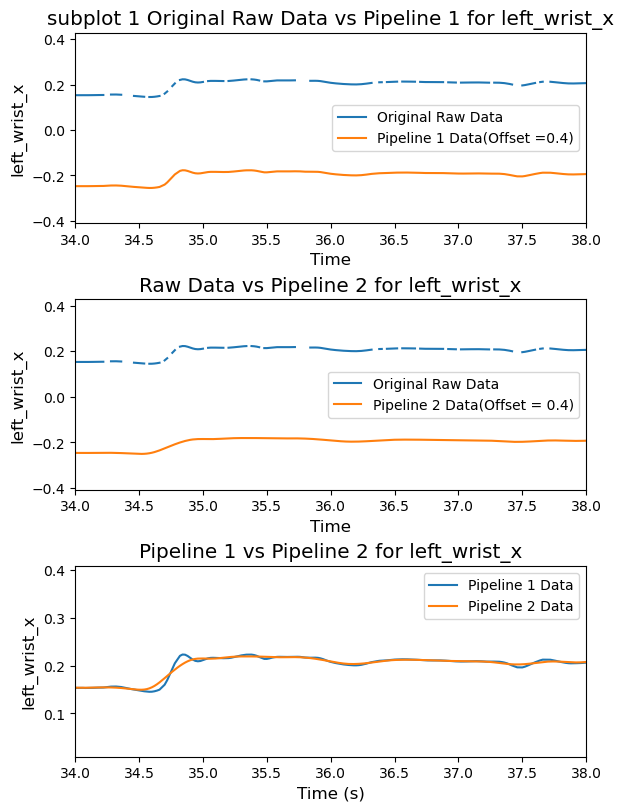

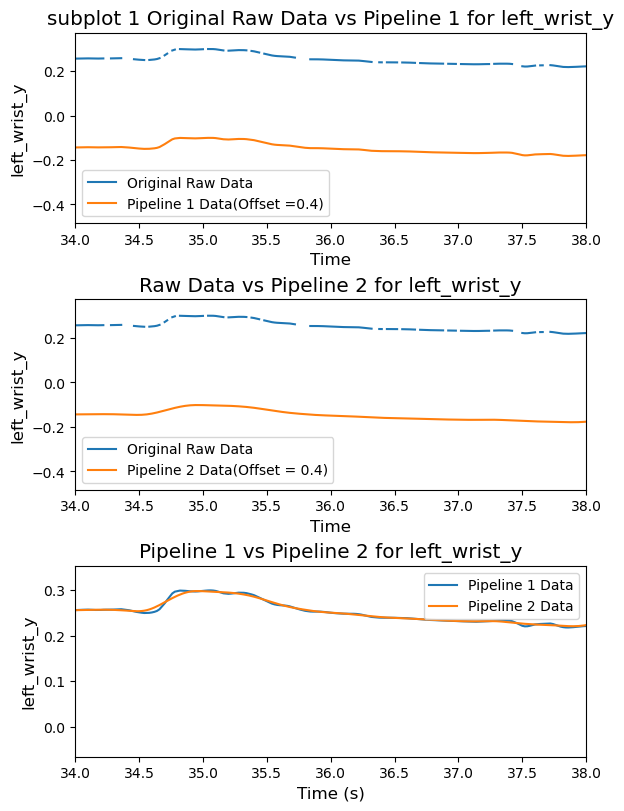

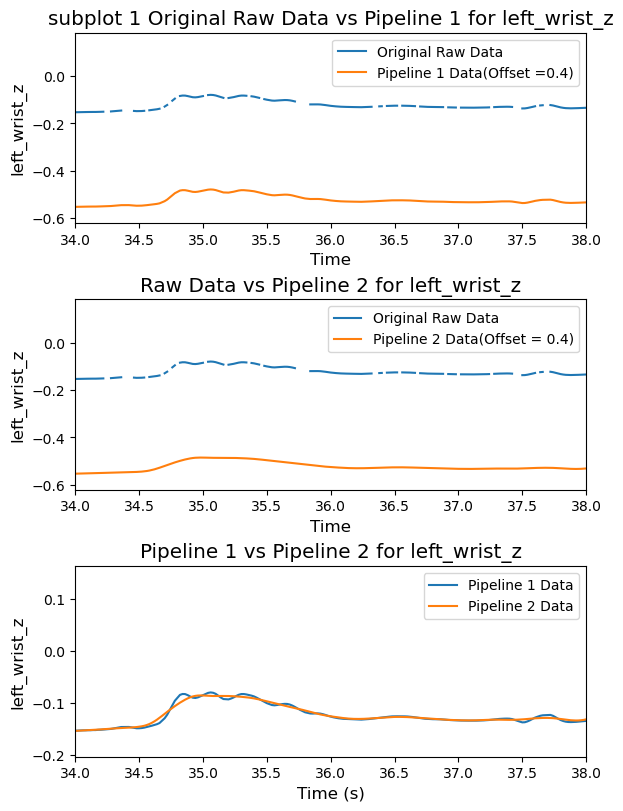

In [72]:
""" TODO
For each selected feature, construct plots comparing the raw data 
to the data from both pipelines. For each selected 
feature, create a figure displaying the raw data and the cleaned 
data in the same subplot. There should be three subplots per feature 
figure. Each subplot is in a separate row.
    subplot(1) will compare the original raw data to the pipeline1 
               pre-processed data.  Vertically offset the two curves
    subplot(2) will compare the original raw data to the pipeline2 
               pre-processed data.  Vertically offset the two curves
    subplot(3) will compare pipeline1 to pipeline2. DO NOT OFFSET
                THE TWO CURVES
    
    Set the x limit to 34-38 seconds.

For all subplots, include axis labels, legends and titles.
"""

# Iterate over the features
for f, fname in enumerate(selected_names):
    # Create a figure with 3 sub-panels
    fig, axs = plt.subplots(3,1, figsize=(6,8))
    axs = axs.ravel()
    # 1. Plot 1 : original raw data with pipeline 1 data
    axs[0].plot(time_df, baby_data_raw[fname], label='Original Raw Data')
    axs[0].plot(time_df, baby_data1[fname] - 0.4, label='Pipeline 1 Data(Offset =0.4)')  # Offset by 0.04
    axs[0].set_xlim([34, 38])
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel(fname)
    axs[0].set_title(f'subplot 1 Original Raw Data vs Pipeline 1 for {fname}')
    axs[0].legend()

    # 2. Plot 2 : Original raw data with pipeline 2 data
    axs[1].plot(time_df, baby_data_raw[fname], label='Original Raw Data')
    axs[1].plot(time_df, baby_data2[fname] - 0.4, label='Pipeline 2 Data(Offset = 0.4)')  # Offset by 0.04
    axs[1].set_xlim([34, 38])
    axs[1].set_xlabel('Time')
    axs[1].set_ylabel(fname)
    axs[1].set_title(f'Raw Data vs Pipeline 2 for {fname}')
    axs[1].legend()

    # 3. Plot 3 : pipeline 1 with pipeline 2 
    axs[2].plot(time_df, baby_data1[fname], label='Pipeline 1 Data')
    axs[2].plot(time_df, baby_data2[fname], label='Pipeline 2 Data')
    axs[2].set_xlim([34, 38])
    axs[2].set_xlabel('Time (s)')
    axs[2].set_ylabel(fname)
    axs[2].set_title(f'Pipeline 1 vs Pipeline 2 for {fname}')
    axs[2].legend()
    plt.tight_layout()
    plt.show()
    
    
    

/tmp/ipykernel_88/1166230839.py:46: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


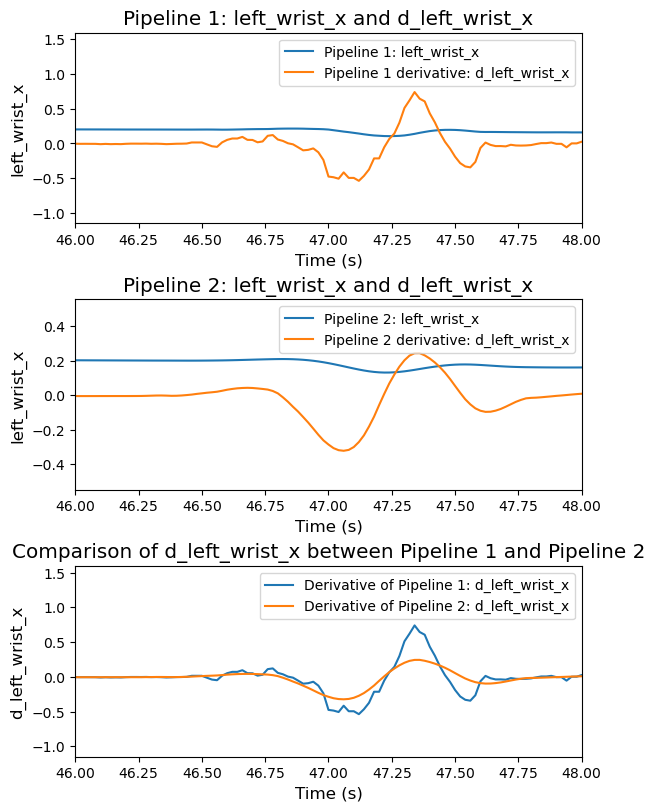

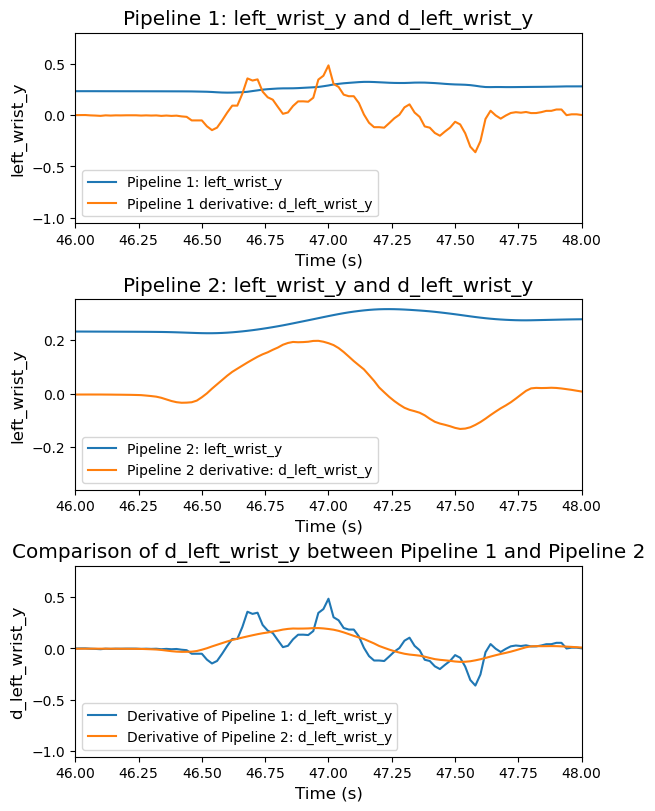

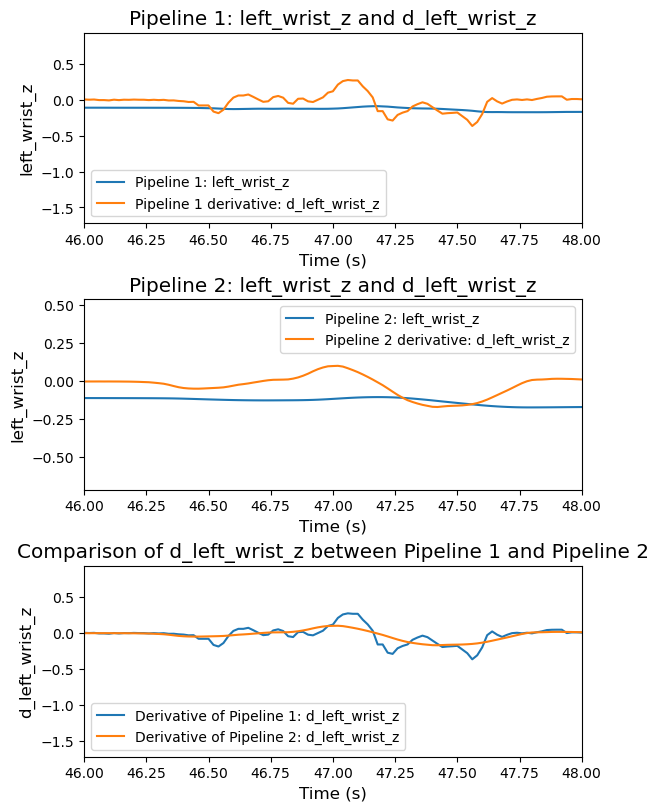

In [73]:
""" TODO
Construct plots for each position feature and its 
derivative from both pipelines. Each figure should have 
3 subplots:
    1: the pipeline1 feature data and cooresponding derivative 
    2: the pipeline2 feature data and corresponding derivative
    3: pipeline1 derivative and pipeline2 derivative. 
    
Set the x limit to 46-48 seconds.

For all subplots, include axis labels, legends and titles.
"""

# Iterate over the features
for f, fname in enumerate(selected_names):
    d_fname = 'd_' + fname
    fig, axs = plt.subplots(3,1,figsize=(6,8))
    axs = axs.ravel()
    
    # 1. Plot 1 : Pipeline 1 feature data with its derivative
    axs[0].plot(time_df, baby_data1[fname], label=f'Pipeline 1: {fname}')
    axs[0].plot(time_df, baby_data1[d_fname], label=f'Pipeline 1 derivative: {d_fname}')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel(fname)
    axs[0].set_xlim([46, 48])
    axs[0].set_title(f'Pipeline 1: {fname} and {d_fname}')
    axs[0].legend()

    # 1. Plot 2 : Pipeline 2 feature data with its derivative
    axs[1].plot(time_df, baby_data2[fname], label=f'Pipeline 2: {fname}')
    axs[1].plot(time_df, baby_data2[d_fname], label=f'Pipeline 2 derivative: {d_fname}')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_xlim([46, 48])
    axs[1].set_ylabel(fname)
    axs[1].set_title(f'Pipeline 2: {fname} and {d_fname}')
    axs[1].legend()

    # 1. Plot 3 : Pipeline 1 Derivative with Pipeline 2 Derivative
    axs[2].plot(time_df, baby_data1[d_fname], label=f'Derivative of Pipeline 1: {d_fname}')
    axs[2].plot(time_df, baby_data2[d_fname], label=f'Derivative of Pipeline 2: {d_fname}')
    axs[2].set_xlim([46, 48])
    axs[2].set_ylabel(d_fname)
    axs[2].set_xlabel('Time (s)')
    axs[2].set_title(f'Comparison of {d_fname} between Pipeline 1 and Pipeline 2')
    axs[2].legend()
    plt.tight_layout()
    plt.show()
    
    


# Reflection

_Q1: For the figure showing the four kernels: which standard deviation choice smooths the timeseries over the longer time period?  Why?_

**ANS** A sigma of 2 smooths the data for a longer time because it takes more points into account when averaging. A larger sigma means the smoothing is spread out over more of the data, making the changes more gradual and less sharp.


_Q2: How many values in the left_wrist_y raw timeseries are NaNs?_

**ANS** From the above observation we can clearly see that we have 1546 NaNs in left_wrist_y of raw data ().


_Q3: How many values in the left_wrist_z timeseries from pipeline 2 are NaNs?_

**ANS** From the above observation, we can see that there are 0 NaNs left_wrist_z of baby_data2


_Q4: Pipeline 1 vs Pipeline 2 comparison for left_wrist_y: which pipeline generated the smoothest curve? Why?_

**ANS** Pipeline 2 produced a smoother curve because it first applies a Gaussian filter to the data, which helps reduce noise, and then computes the derivatives. In contrast, Pipeline 1 computes derivatives directly from the raw data without any prior smoothing, resulting in more fluctuations in the curve.


_Q5: What is the length in time of the smoothing kernel in pipeline 2?_

**ANS** Length in time => kernal size * dt = 19 * 0.02 = 0.38 sec.
        Therefore the length in time of the smoothing kernel in pipeline 2 is 0.38 seconds.
    
